In [615]:
import math
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_context("paper", font_scale=1.2)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [616]:
# data = []
# for i in range(360, 0, -5):
#     data.append([i, -90, 0])
#
# df_real = pd.DataFrame(data, columns=['correct_roll', 'correct_pitch', 'correct_yaw'])
# df_real['correct_roll'] = df_real['correct_roll'].apply(lambda x: x % 360)
# df_real.to_csv("../test_images/perfect_5degstep/real_scores.csv")

In [617]:
def get_rotated_point(roll, pitch, yaw):
    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, [1, 0, 0])

    return rotated_3d_points

In [618]:
# rename columns yaw to roll, pitch to yaw, roll to pitch
# df = df.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})

In [619]:
# df['og_roll'] = df['roll']
# df['og_pitch'] = df['pitch']
# df['og_yaw'] = df['yaw']
# df['og_correct_roll'] = df['correct_roll']
# df['og_correct_pitch'] = df['correct_pitch']
# df['og_correct_yaw'] = df['correct_yaw']

# df['roll'] = df['roll'].apply(lambda a: (a + 180) % 360 - 180)
# df['correct_roll'] = df['correct_roll'].apply(lambda a: (a + 180) % 360 - 180)
# df['yaw'] = df['yaw'].apply(lambda a: (a + 180) % 360 - 180)
# df['correct_yaw'] = df['correct_yaw'].apply(lambda a: (a + 180) % 360 - 180)

In [620]:
# df['og_roll'] = df['roll']
# # df['roll'] = df['roll'].apply(lambda x: x % 360)
# # df['yaw'] = df['yaw'].apply(lambda x: x % 360)
# # start real roll from roll index 0 and decreasing -5 each time wrapping around % 360
# df['og_real_roll'] = df['roll'].iloc[0] - 5 * df['img_number'] + (df['img_number'].iloc[0] * 5)
# df['real_roll'] = df['og_real_roll'].apply(lambda x: x % 360)

In [621]:
# fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
# sns.scatterplot(ax=axes[0], data=df, x='img_number', y='roll', hue='loss');
# sns.scatterplot(ax=axes[0], data=df, x='img_number', y='correct_roll', color='green', alpha=0.5);
# # sns.scatterplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
# # axes[0].set_yticks(range(0, 361, 45));
# # sns.lineplot(ax=axes[0], data=df, x='img_number', y='real_roll', color='red', alpha=0.5);
# # axes[0].vlines(x=44, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
# # axes[0].vlines(x=62, ymin=0, ymax=360, color='red', linestyles='dashed', alpha=0.5)
# sns.scatterplot(ax=axes[1], data=df, x='img_number', y='pitch', hue='loss');
# sns.scatterplot(ax=axes[1], data=df, x='img_number', y='correct_pitch', color='green', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number', y='yaw', hue='loss');
# sns.scatterplot(ax=axes[2], data=df, x='img_number', y='correct_yaw', color='green', alpha=0.5);
# # axes[2].set_yticks(range(0, 361, 45));

In [622]:
df_real = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/real_scores.csv")
df_real[['x_real', 'y_real', 'z_real']] = df_real.apply(
    lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
    result_type='expand')

In [623]:
df_real

,correct_roll,correct_pitch,correct_yaw,x_real,y_real,z_real
0,127.970000,-79.560000,-44.000000,0.130349,-0.125876,0.983445
1,123.295573,-78.244572,-44.152291,0.146178,-0.141915,0.979026
2,119.068439,-76.935369,-44.763274,0.160501,-0.159180,0.974116
3,115.161870,-75.638750,-45.707437,0.173208,-0.177539,0.968751
4,111.491226,-74.359729,-46.901282,0.184204,-0.196853,0.962973
...,...,...,...,...,...,...
68,157.623186,-84.620406,-54.433702,0.054531,-0.076263,0.995595
69,147.366750,-83.432329,-48.971823,0.075080,-0.086284,0.993437
70,139.573127,-82.170727,-45.978678,0.094664,-0.097955,0.990678
71,133.288987,-80.872993,-44.502381,0.113134,-0.111185,0.987339


In [624]:
df_3eps = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_3eps.csv")
df_2eps = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores.csv")
df_3eps_linefit = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_3eps_linefit.csv")
# rename columns yaw to roll, pitch to yaw, roll to pitch
df_3eps = df_3eps.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
df_2eps = df_2eps.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
df_3eps_linefit = df_3eps_linefit.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
# merge all
df = df_3eps.merge(df_2eps, left_index=True, right_index=True, suffixes=('_3eps', '_2eps'))
# add _linefit to column names in df_3eps_linefit
df_3eps_linefit.columns = [str(col) + '_linefit' for col in df_3eps_linefit.columns]
df = df.merge(df_3eps_linefit, left_index=True, right_index=True, suffixes=('', '_linefit'))

# df rename columns yaw to roll, pitch to yaw, roll to pitch, remember suffixes

In [625]:
df

,img_number_3eps,iterations_3eps,loss_3eps,pitch_3eps,yaw_3eps,roll_3eps,x_3eps,y_3eps,z_3eps,img_number_2eps,...,z_2eps,img_number_linefit,iterations_linefit,loss_linefit,pitch_linefit,yaw_linefit,roll_linefit,x_linefit,y_linefit,z_linefit
0,0,24051,376.032793,-45.823507,-105.000002,134.000711,0.014449,-0.002257,-0.042384,0,...,0.016239,0,4086,30.710010,-47.374042,-112.000000,135.000000,0.200000,0.078603,-0.200000
1,1,701,52.515388,-53.823507,-109.000002,138.000711,0.214449,0.040417,-0.242384,1,...,0.216239,1,1010,0.747982,-50.015089,-109.000001,132.000126,0.276873,0.118594,0.000000
2,2,4138,17.114448,-57.416562,-105.000002,134.000711,0.269180,0.142569,-0.042384,2,...,0.297190,2,4194,5.981270,-52.370278,-106.000001,129.000126,0.292458,0.126255,0.200000
3,3,5555,2.054045,-59.767654,-102.532048,130.000711,0.270879,0.182411,0.143374,3,...,0.401968,3,7078,3.779624,-54.317149,-103.000001,126.000149,0.297244,0.135704,0.280578
4,4,1200,0.609446,-61.417688,-106.518170,126.347056,0.309525,0.164716,0.199636,4,...,0.345514,4,6125,2.439829,-56.295052,-100.000001,123.000149,0.313988,0.148901,0.424497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,4819,9.217898,-271.025165,-83.135369,17.838457,0.243862,0.131080,0.662247,68,...,0.735001,68,4405,8.117959,-251.726945,-81.912056,-1.064234,0.271224,0.122173,0.767898
69,69,4895,13.050654,-271.720143,-82.957343,13.838457,0.254679,0.136700,0.575573,69,...,0.735001,69,4410,8.169788,-253.876986,-82.161780,-4.064234,0.272409,0.133211,0.714004
70,70,4763,8.724869,-272.528356,-83.832634,9.838457,0.265335,0.143923,0.526701,70,...,0.535001,70,5910,6.284294,-255.550533,-85.160964,-7.064234,0.261046,0.136212,0.515488
71,71,3589,3.315776,-272.967013,-87.832634,5.838458,0.265217,0.125469,0.369652,71,...,0.535001,71,1191,1.156085,-256.915117,-85.885275,-10.064229,0.275072,0.129076,0.508176


In [626]:
suffixes = ['_3eps', '_2eps', '_linefit']
colors = ['red', 'green', 'blue']

for suffix in suffixes:
    df[['x_calculated' + suffix, 'y_calculated' + suffix, 'z_calculated' + suffix]] = df.apply(
        lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix]), axis=1,
        result_type='expand')

In [627]:
df

,img_number_3eps,iterations_3eps,loss_3eps,pitch_3eps,yaw_3eps,roll_3eps,x_3eps,y_3eps,z_3eps,img_number_2eps,...,z_linefit,x_calculated_3eps,y_calculated_3eps,z_calculated_3eps,x_calculated_2eps,y_calculated_2eps,z_calculated_2eps,x_calculated_linefit,y_calculated_linefit,z_calculated_linefit
0,0,24051,376.032793,-45.823507,-105.000002,134.000711,0.014449,-0.002257,-0.042384,0,...,-0.200000,-0.180363,-0.673126,0.717197,-0.175841,-0.656247,0.733771,-0.253687,-0.627898,0.735790
1,1,701,52.515388,-53.823507,-109.000002,138.000711,0.214449,0.040417,-0.242384,1,...,0.000000,-0.192175,-0.558116,0.807203,-0.127691,-0.656913,0.743075,-0.209205,-0.607577,0.766214
2,2,4138,17.114448,-57.416562,-105.000002,134.000711,0.269180,0.142569,-0.042384,2,...,0.200000,-0.139381,-0.520177,0.842608,-0.132131,-0.640403,0.756588,-0.168292,-0.586904,0.791973
3,3,5555,2.054045,-59.767654,-102.532048,130.000711,0.270879,0.182411,0.143374,3,...,0.280578,-0.109254,-0.491512,0.863991,-0.170780,-0.609286,0.774341,-0.131214,-0.568348,0.812258
4,4,1200,0.609446,-61.417688,-106.518170,126.347056,0.309525,0.164716,0.199636,4,...,0.424497,-0.136024,-0.458676,0.878131,-0.126208,-0.611363,0.781221,-0.096360,-0.546486,0.831906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,4819,9.217898,-271.025165,-83.135369,17.838457,0.243862,0.131080,0.662247,68,...,0.767898,0.002138,-0.017763,-0.999840,-0.045677,0.323643,-0.945076,-0.044114,0.310427,-0.949573
69,69,4895,13.050654,-271.720143,-82.957343,13.838457,0.254679,0.136700,0.575573,69,...,0.714004,0.003680,-0.029791,-0.999549,-0.045677,0.323643,-0.945076,-0.037872,0.275106,-0.960668
70,70,4763,8.724869,-272.528356,-83.832634,9.838457,0.265335,0.143923,0.526701,70,...,0.515488,0.004739,-0.043858,-0.999027,-0.026042,0.190367,-0.981367,-0.021049,0.248637,-0.968368
71,71,3589,3.315776,-272.967013,-87.832634,5.838458,0.265217,0.125469,0.369652,71,...,0.508176,0.001958,-0.051724,-0.998660,-0.026042,0.190367,-0.981367,-0.016245,0.225811,-0.974036


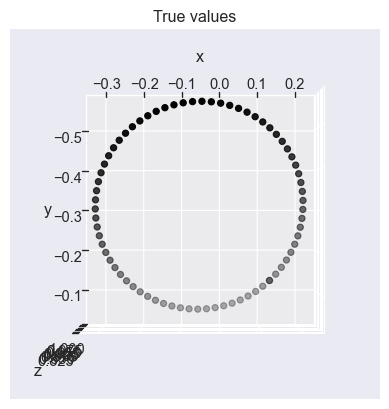

In [628]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(azim=-90, elev=-90)
ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('True values')
plt.show()

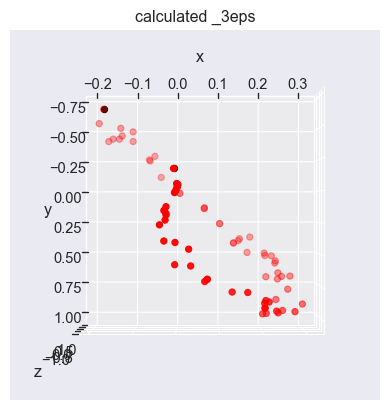

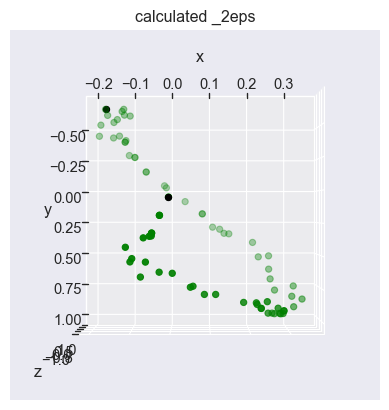

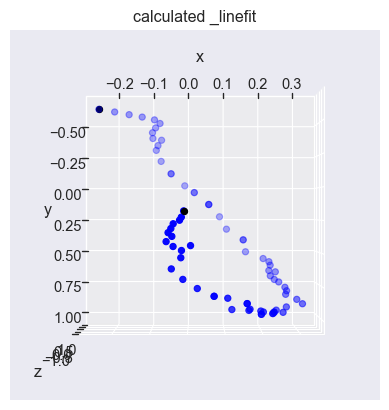

In [638]:
# make 3d plot of calculated points
for suffix, color in zip(suffixes, colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-90, elev=-90)
    ax.scatter3D(df['x_calculated' + suffix], df['y_calculated' + suffix], df['z_calculated' + suffix], color=color);
    # first and last point in black
    ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
                 df['z_calculated' + suffix].iloc[0], color="black");
    ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
                 df['z_calculated' + suffix].iloc[-1], color="black");

    # ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('calculated ' + suffix)
    plt.show()

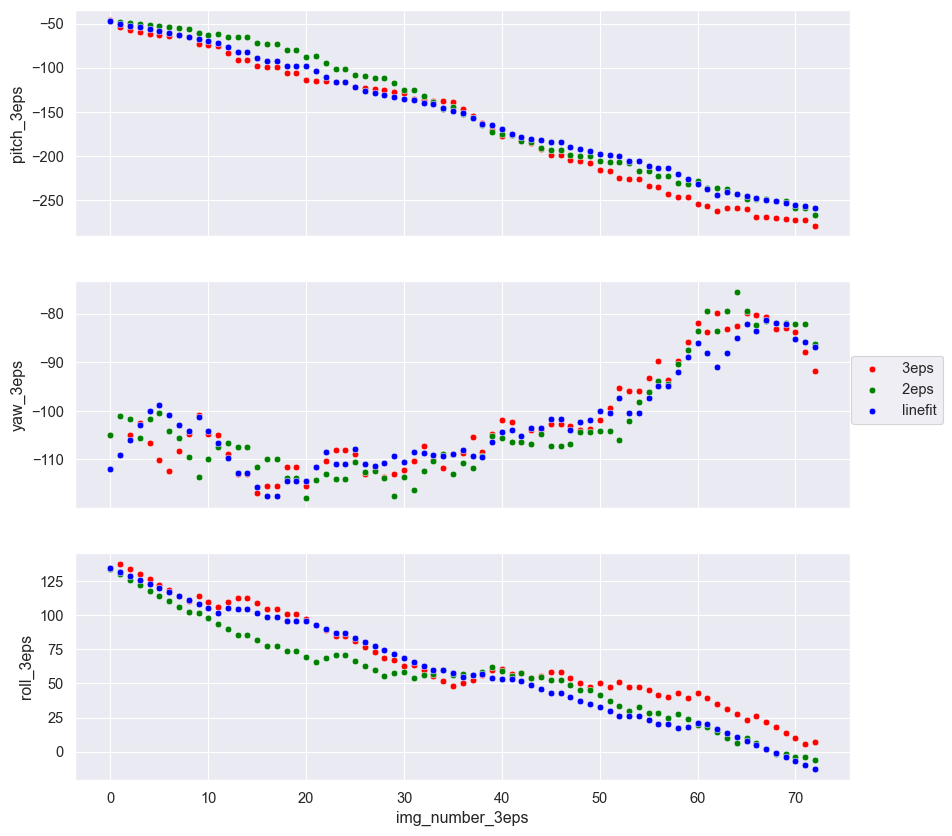

In [630]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='pitch' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='yaw' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='roll' + suffix, color=color);
# axes[0].set_yticks(range(0, 361, 45));
# sns.scatterplot(ax=axes[1], data=df, x='img_number_x', y='yaw_x', hue='loss_x');
# sns.scatterplot(ax=axes[1], data=df, x='img_number_y', y='yaw_y', hue='loss_y', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number_x', y='roll_x', hue='loss_x');
# sns.scatterplot(ax=axes[2], data=df, x='img_number_y', y='roll_y', hue='loss_y', alpha=0.5);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))
# axes[2].set_yticks(range(0, 361, 45));

In [631]:
df_real[['x_real', 'y_real', 'z_real']]

,x_real,y_real,z_real
0,0.130349,-0.125876,0.983445
1,0.146178,-0.141915,0.979026
2,0.160501,-0.159180,0.974116
3,0.173208,-0.177539,0.968751
4,0.184204,-0.196853,0.962973
...,...,...,...
68,0.054531,-0.076263,0.995595
69,0.075080,-0.086284,0.993437
70,0.094664,-0.097955,0.990678
71,0.113134,-0.111185,0.987339


In [632]:
# get first and last row
df.iloc[[0, -1]]

,img_number_3eps,iterations_3eps,loss_3eps,pitch_3eps,yaw_3eps,roll_3eps,x_3eps,y_3eps,z_3eps,img_number_2eps,...,z_linefit,x_calculated_3eps,y_calculated_3eps,z_calculated_3eps,x_calculated_2eps,y_calculated_2eps,z_calculated_2eps,x_calculated_linefit,y_calculated_linefit,z_calculated_linefit
0,0,24051,376.032793,-45.823507,-105.000002,134.000711,0.014449,-0.002257,-0.042384,0,...,-0.200000,-0.180363,-0.673126,0.717197,-0.175841,-0.656247,0.733771,-0.253687,-0.627898,0.735790
72,72,1306,1.560111,-279.634649,-91.783164,7.051551,0.259556,0.144758,0.276978,72,...,0.354214,-0.005208,-0.167284,-0.985895,-0.003549,0.053573,-0.998558,-0.010105,0.179465,-0.983712


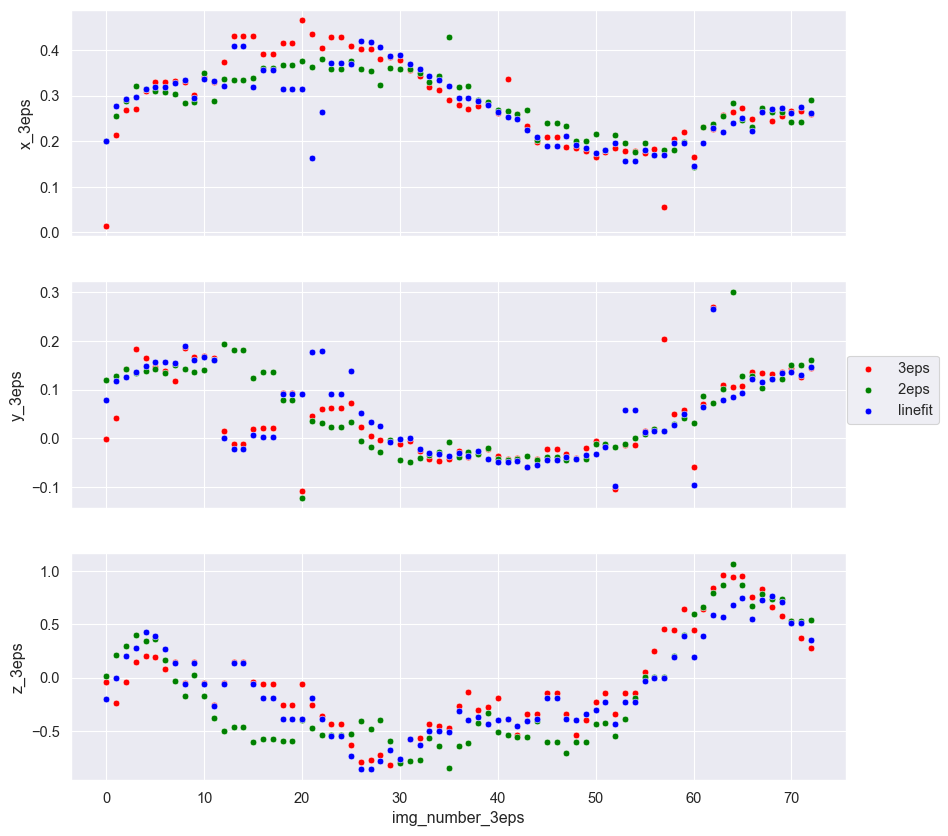

In [633]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='x' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='y' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='z' + suffix, color=color);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))

In [634]:
df

,img_number_3eps,iterations_3eps,loss_3eps,pitch_3eps,yaw_3eps,roll_3eps,x_3eps,y_3eps,z_3eps,img_number_2eps,...,z_linefit,x_calculated_3eps,y_calculated_3eps,z_calculated_3eps,x_calculated_2eps,y_calculated_2eps,z_calculated_2eps,x_calculated_linefit,y_calculated_linefit,z_calculated_linefit
0,0,24051,376.032793,-45.823507,-105.000002,134.000711,0.014449,-0.002257,-0.042384,0,...,-0.200000,-0.180363,-0.673126,0.717197,-0.175841,-0.656247,0.733771,-0.253687,-0.627898,0.735790
1,1,701,52.515388,-53.823507,-109.000002,138.000711,0.214449,0.040417,-0.242384,1,...,0.000000,-0.192175,-0.558116,0.807203,-0.127691,-0.656913,0.743075,-0.209205,-0.607577,0.766214
2,2,4138,17.114448,-57.416562,-105.000002,134.000711,0.269180,0.142569,-0.042384,2,...,0.200000,-0.139381,-0.520177,0.842608,-0.132131,-0.640403,0.756588,-0.168292,-0.586904,0.791973
3,3,5555,2.054045,-59.767654,-102.532048,130.000711,0.270879,0.182411,0.143374,3,...,0.280578,-0.109254,-0.491512,0.863991,-0.170780,-0.609286,0.774341,-0.131214,-0.568348,0.812258
4,4,1200,0.609446,-61.417688,-106.518170,126.347056,0.309525,0.164716,0.199636,4,...,0.424497,-0.136024,-0.458676,0.878131,-0.126208,-0.611363,0.781221,-0.096360,-0.546486,0.831906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,4819,9.217898,-271.025165,-83.135369,17.838457,0.243862,0.131080,0.662247,68,...,0.767898,0.002138,-0.017763,-0.999840,-0.045677,0.323643,-0.945076,-0.044114,0.310427,-0.949573
69,69,4895,13.050654,-271.720143,-82.957343,13.838457,0.254679,0.136700,0.575573,69,...,0.714004,0.003680,-0.029791,-0.999549,-0.045677,0.323643,-0.945076,-0.037872,0.275106,-0.960668
70,70,4763,8.724869,-272.528356,-83.832634,9.838457,0.265335,0.143923,0.526701,70,...,0.515488,0.004739,-0.043858,-0.999027,-0.026042,0.190367,-0.981367,-0.021049,0.248637,-0.968368
71,71,3589,3.315776,-272.967013,-87.832634,5.838458,0.265217,0.125469,0.369652,71,...,0.508176,0.001958,-0.051724,-0.998660,-0.026042,0.190367,-0.981367,-0.016245,0.225811,-0.974036


In [635]:
#flatten list
plots = sorted([item for sublist in [['x' + s, 'y' + s, 'z' + s] for s in suffixes] for item in sublist])
df[plots].describe()


,x_2eps,x_3eps,x_linefit,y_2eps,y_3eps,y_linefit,z_2eps,z_3eps,z_linefit
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.284618,0.288893,0.277372,0.050763,0.043038,0.048209,-0.169292,-0.048813,-0.108172
std,0.065442,0.094256,0.074945,0.085301,0.083230,0.083385,0.519742,0.454549,0.431463
min,0.143998,0.014449,0.145843,-0.122480,-0.107906,-0.098638,-0.847867,-0.817821,-0.863469
25%,0.238187,0.220242,0.209459,-0.028005,-0.023135,-0.030812,-0.570498,-0.345803,-0.399364
50%,0.286649,0.271682,0.276873,0.031194,0.019382,0.033405,-0.407231,-0.145576,-0.189082
75%,0.342462,0.374409,0.331929,0.133705,0.116809,0.122173,0.216239,0.189751,0.193673
max,0.427727,0.465462,0.418548,0.301186,0.270523,0.264824,1.071010,0.967887,0.767898


In [636]:
df[sorted([item for sublist in [['iterations' + s, 'loss' + s] for s in suffixes] for item in sublist])].describe()

,iterations_2eps,iterations_3eps,iterations_linefit,loss_2eps,loss_3eps,loss_linefit
count,73.000000,73.000000,73.000000,7.300000e+01,7.300000e+01,7.300000e+01
mean,3182.890411,3032.273973,3393.876712,1.096227e+05,8.223582e+04,1.096238e+05
std,4062.361490,3242.905184,3586.288506,3.145268e+05,2.765442e+05,3.145264e+05
min,530.000000,701.000000,539.000000,8.280477e-11,7.081230e-10,1.354033e-11
25%,1202.000000,1204.000000,1194.000000,3.277431e-01,3.989206e-01,8.989324e-01
50%,1274.000000,1256.000000,2165.000000,1.341655e+00,1.793784e+00,2.705661e+00
75%,4466.000000,4653.000000,4858.000000,5.665322e+00,1.711445e+01,3.071001e+01
max,26477.000000,24051.000000,25069.000000,1.000000e+06,1.000000e+06,1.000000e+06


KeyError: 'roll'

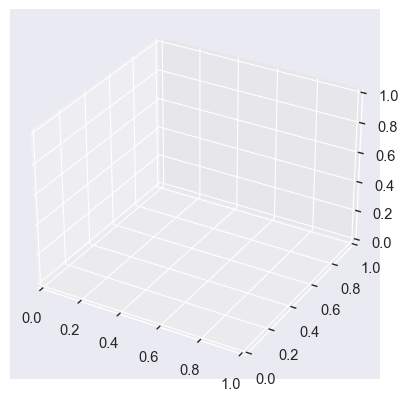

In [637]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='correct_roll', y='roll', hue='loss')

In [ ]:
df['roll_diff'] = df['og_correct_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [ ]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_correct_roll', y='og_roll');

In [ ]:
ax = sns.regplot(data=df, x='correct_roll', y='roll');

In [ ]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

In [ ]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

In [ ]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

In [ ]:
sns.scatterplot(data=df, y='loss', x='iterations');
